In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPooling2D , Flatten , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.image import rgb_to_grayscale

from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from PIL import Image ,  ImageOps

np.set_printoptions(suppress=True)

train (60000, 28, 28)
test (10000, 28, 28)


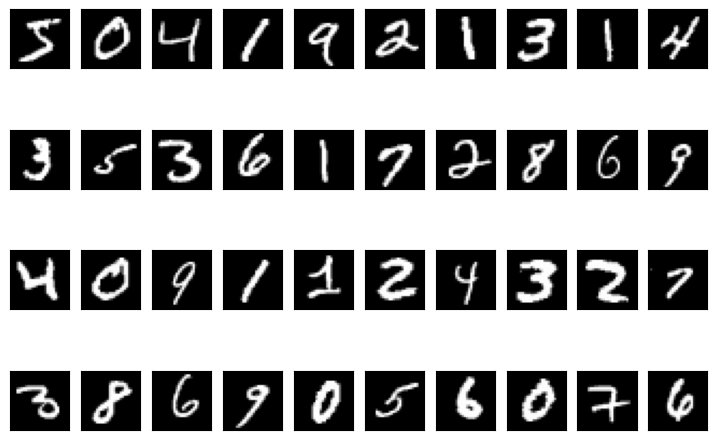

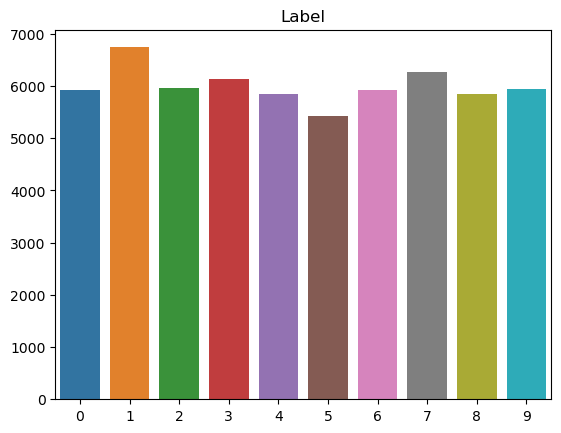

In [2]:
# Load data & Visualize

(X_train , y_train),(X_test , y_test) = load_data()

print('train',X_train.shape)
print('test',X_test.shape)

def visual_multi():
    nplots = 40
    fig = plt.figure(figsize=(9,6))
    for j in range(nplots):
        plt.subplot(4,10,j+1)
        plt.imshow(X_train[j]  , cmap='gray')
        plt.yticks([]);plt.xticks([])
    plt.show()
        
        
def visual_label(data):
    x , y = np.unique(data , return_counts=True)
    sns.barplot(x=x,y=y)
    plt.title('Label');
    plt.show()
        
visual_multi()
visual_label(y_train)

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Prepare Dataset

X_train = np.expand_dims(X_train , -1)
X_test = np.expand_dims(X_test , -1)

X_train = X_train / 255
X_test =  X_test / 255

print('reshape to tensor:',X_train.shape)
print('reshape to tensor:',X_test.shape)    


reshape to tensor: (60000, 28, 28, 1)
reshape to tensor: (10000, 28, 28, 1)


In [5]:
num_classes = len(np.unique(y_train))
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [6]:
# Create Model
# 28 x 28 x 1
# Kernel 3 x 3
# Fully connected
# Output 10 node

model = Sequential()
model.add(Input(shape=(in_shape)))

model.add(Conv2D(32 , (3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(num_classes , activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
Er = EarlyStopping(patience=10)

history = model.fit(X_train , y_train , epochs=100 ,batch_size=128 , verbose=2 , validation_split=0.3 , callbacks=[Er])

Epoch 1/100
329/329 - 9s - 26ms/step - accuracy: 0.9119 - loss: 0.2896 - val_accuracy: 0.9746 - val_loss: 0.0857
Epoch 2/100
329/329 - 8s - 25ms/step - accuracy: 0.9736 - loss: 0.0891 - val_accuracy: 0.9804 - val_loss: 0.0626
Epoch 3/100
329/329 - 8s - 26ms/step - accuracy: 0.9808 - loss: 0.0643 - val_accuracy: 0.9836 - val_loss: 0.0537
Epoch 4/100
329/329 - 9s - 27ms/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9869 - val_loss: 0.0436
Epoch 5/100
329/329 - 9s - 28ms/step - accuracy: 0.9855 - loss: 0.0447 - val_accuracy: 0.9884 - val_loss: 0.0397
Epoch 6/100
329/329 - 9s - 29ms/step - accuracy: 0.9883 - loss: 0.0353 - val_accuracy: 0.9879 - val_loss: 0.0401
Epoch 7/100
329/329 - 9s - 27ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9896 - val_loss: 0.0348
Epoch 8/100
329/329 - 8s - 26ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9903 - val_loss: 0.0327
Epoch 9/100
329/329 - 9s - 26ms/step - accuracy: 0.9913 - loss: 0.0260 - val_accuracy: 0.9901 - 

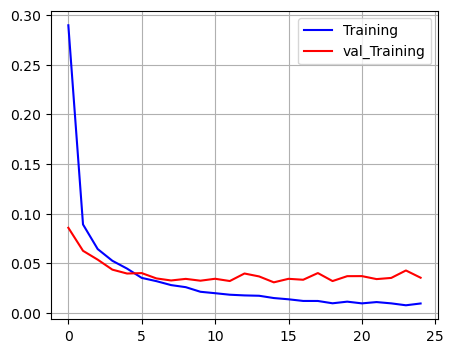

In [8]:
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'],color='b',label='Training')
plt.plot(history.history['val_loss'],color='r',label='val_Training')
plt.legend()
plt.grid()


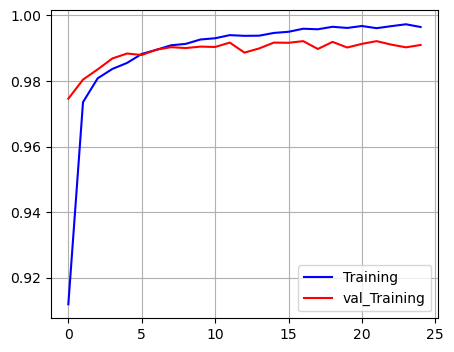

In [9]:
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'],color='b',label='Training')
plt.plot(history.history['val_accuracy'],color='r',label='val_Training')
plt.legend()
plt.grid()


In [10]:
loss , score = model.evaluate(X_test , y_test)
print('Loss:',loss)
print('Score:',score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9890 - loss: 0.0405
Loss: 0.03106420300900936
Score: 0.991599977016449


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


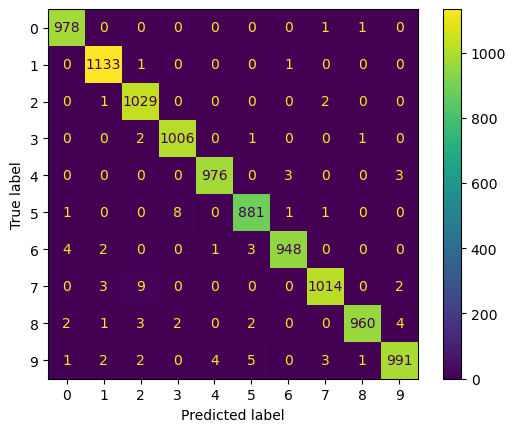

In [11]:
y_pred = np.argmax(model.predict(X_test) , axis=1)

cm = confusion_matrix(y_test , y_pred)
ConfusionMatrixDisplay(cm ).plot();

In [12]:
from PIL import Image, ImageOps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.         0.00000041 0.         0.         0.99999964 0.00000001
  0.         0.         0.         0.00000001]]
Argmax: [4]


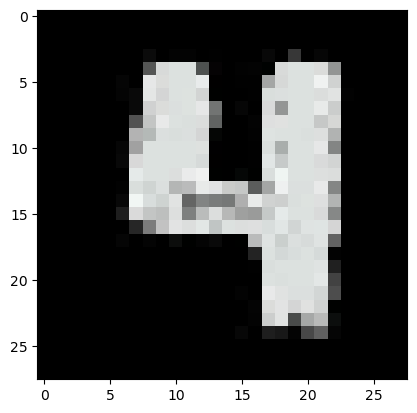

In [36]:
def prediction(img_name):
    
    img = load_img(img_name , target_size=(28,28))
    img_ops = ImageOps.invert(img)
    img_arr = img_to_array(img_ops)
    img_gray = rgb_to_grayscale(img_arr)
    img_tensor = np.expand_dims(img_gray , axis=0) / 255
    
    y_pred = model.predict(img_tensor)
    print(y_pred)
    print('Argmax:',np.argmax(y_pred , axis=1))
    
    plt.imshow(img_ops ,  cmap='gray')
    plt.show()
    return 



prediction('44.png')